In [1]:
import pandas as pd
import numpy as np

In [2]:
# Load the training dataset
file_path_train = "/Users/huaijinsun/Downloads/training.xlsx"
df_train = pd.read_excel(file_path_train)

# Load the testing dataset
file_path_test = "/Users/huaijinsun/Downloads/scoring.xlsx"
df_test = pd.read_excel(file_path_test)

In [3]:
# Tidy data

# Remove the 'Region' column
df_train = df_train.drop(columns=['Region'])
df_test = df_test.drop(columns=['Region'])

# Convert all values in 'GVWR Class' column to strings
df_train['GVWR Class'] = df_train['GVWR Class'].astype(str)
df_test['GVWR Class'] = df_test['GVWR Class'].astype(str)

# Convert all values in 'Number of Vehicles Registered at the Same Address' column to strings
df_train['Number of Vehicles Registered at the Same Address'] = df_train['Number of Vehicles Registered at the Same Address'].astype(str)
df_test['Number of Vehicles Registered at the Same Address'] = df_test['Number of Vehicles Registered at the Same Address'].astype(str)

print(df_train.head())
print(df_test.head())

   Date Vehicle Category      GVWR Class Fuel Type  Model Year  \
0  2019                P  Not Applicable  Gasoline      2020.0   
1  2020                P  Not Applicable  Gasoline      2020.0   
2  2021                P  Not Applicable  Gasoline      2020.0   
3  2019                P  Not Applicable  Gasoline      2019.0   
4  2019                P  Not Applicable  Gasoline      2018.0   

  Fuel Technology Electric Mile Range  \
0             ICE      Not Applicable   
1             ICE      Not Applicable   
2             ICE      Not Applicable   
3             ICE      Not Applicable   
4             ICE      Not Applicable   

  Number of Vehicles Registered at the Same Address  Vehicle Population  
0                                                ≥4              395883  
1                                                 1              370954  
2                                                 1              349406  
3                                                ≥4         

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Transform Date, GVWR Class Fuel Type, Model Year, Fuel Technology, Electric Mile Range, and Number of Vehicles Registered at the Same Address columns into Categorical variables
# Initialize the LabelEncoder
label_encoders = {}

# List of columns to encode
columns_to_encode = ['Date', 'Vehicle Category', 'GVWR Class', 'Fuel Type', 'Model Year', 'Fuel Technology', 'Electric Mile Range', 'Number of Vehicles Registered at the Same Address']

# Fit and transform the training data, and transform the test data
for column in columns_to_encode:
	# Transform the training data
	label_encoders[column] = LabelEncoder()
	df_train[column] = label_encoders[column].fit_transform(df_train[column])

	# Transform the test data
	df_test[column] = df_test[column].map(lambda s: '<unknown>' if s not in label_encoders[column].classes_ else s)
	label_encoders[column].classes_ = np.append(label_encoders[column].classes_, '<unknown>')
	df_test[column] = label_encoders[column].transform(df_test[column])

# Display the first few rows of the updated dataset
print(df_train.head())
print(df_test.head())

   Date  Vehicle Category  GVWR Class  Fuel Type  Model Year  Fuel Technology  \
0     0                 5           8          2          45                2   
1     1                 5           8          2          45                2   
2     2                 5           8          2          45                2   
3     0                 5           8          2          44                2   
4     0                 5           8          2          43                2   

   Electric Mile Range  Number of Vehicles Registered at the Same Address  \
0                    4                                                  4   
1                    4                                                  0   
2                    4                                                  0   
3                    4                                                  4   
4                    4                                                  4   

   Vehicle Population  
0              395883  
1 

In [6]:
X_train = df_train.drop(columns=['Vehicle Population']) 
y_train = df_train['Vehicle Population']  
X_test = df_test.drop(columns=['Vehicle Population'])  
y_test = df_test['Vehicle Population']  

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import mean_squared_error

# Build the neural network model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='relu'))

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(loss='mean_squared_error', optimizer=optimizer)

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rms = math.sqrt(mse)
print(f"rms: {rms}")

Epoch 1/100


2025-02-01 20:32:22.603871: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1027/1027 [==============================] - 1s 434us/step - loss: 436693856.0000 - val_loss: 19148088.0000
Epoch 2/100
1027/1027 [==============================] - 0s 380us/step - loss: 426624544.0000 - val_loss: 23298916.0000
Epoch 3/100
1027/1027 [==============================] - 0s 376us/step - loss: 419526976.0000 - val_loss: 34344800.0000
Epoch 4/100
1027/1027 [==============================] - 0s 405us/step - loss: 412478272.0000 - val_loss: 43511276.0000
Epoch 5/100
1027/1027 [==============================] - 0s 378us/step - loss: 404543776.0000 - val_loss: 32732702.0000
Epoch 6/100
1027/1027 [==============================] - 0s 380us/step - loss: 392703136.0000 - val_loss: 32740264.0000
Epoch 7/100
1027/1027 [==============================] - 0s 394us/step - loss: 383025120.0000 - val_loss: 44500696.0000
Epoch 8/100
1027/1027 [==============================] - 0s 379us/step - loss: 371237632.0000 - val_loss: 32764226.0000
Epoch 9/100
1027/1027 [=============================

In [8]:
# K-fold cross-validation
from sklearn.model_selection import KFold

# Define the K-fold Cross Validator
kf = KFold(n_splits = 5, shuffle = True, random_state = 42)

# Initialize lists to store results
mse_scores = []

# K-fold Cross Validation model evaluation
for train_index, val_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
    
    # Build the neural network model
    model = Sequential()
    model.add(Dense(64, input_dim=X_train_fold.shape[1], activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='linear'))
    
    # Compile the model
    optimizer = Adam(learning_rate=0.001)
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    
    # Train the model
    model.fit(X_train_fold, y_train_fold, epochs=100, batch_size=32, verbose=0)

    # Evaluate the model on the validation fold
    y_val_pred = model.predict(X_val_fold)
    mse = mean_squared_error(y_val_fold, y_val_pred)
    mse_scores.append(mse)

# Calculate the average MSE from cross-validation
average_mse_cv = np.mean(mse_scores)
print(f"Cross-Validation Mean Squared Error: {average_mse_cv}")

# Evaluate the model on the testing dataset
y_test_pred = model.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
rms_test = np.sqrt(mse_test)
print(f"Testing Root Mean Squared Error: {rms_test}")

257/257 [==============================] - 0s 210us/step


257/257 [==============================] - 0s 215us/step


257/257 [==============================] - 0s 201us/step


257/257 [==============================] - 0s 210us/step


257/257 [==============================] - 0s 202us/step
Cross-Validation Mean Squared Error: 127240695.47192375
236/236 [==============================] - 0s 187us/step
Testing Mean Squared Error: 10653.802858558787


In [9]:
from sklearn.model_selection import train_test_split

# Split our training data into training and validation sets
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 42)

In [10]:
# Random Forest Regressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the model
model = RandomForestRegressor()

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, cv = 5, scoring = 'neg_mean_squared_error', n_jobs = -1)
grid_search.fit(X_train1, y_train1)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on the validation set
y_pred_cv = best_model.predict(X_val)
rms_cv = np.sqrt(mean_squared_error(y_val, y_pred_cv))
print(f'RMS Error on CV Set: {rms_cv}')

# Evaluate the best model on the test set
y_pred_test = best_model.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)
rms_test = np.sqrt(mse)
print(f"Testing Root Mean Error on Test Set: {rms_test}")

/opt/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


RMS Error on CV Set: 4230.783459695804
Testing Root Mean Error on Test Set: 10950.880081889949


In [11]:
# The best parameters and model for the Random Forest Regressor
print(f"BEST PARAM: {best_params}")
print(f"BEST MODEL: {best_model}")

BEST PARAM: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
BEST MODEL: RandomForestRegressor(n_estimators=300)


In [16]:
import matplotlib.pyplot as plt

# Extract one of the trees from the Random Forest
estimator = best_model.estimators_[0]

# Plot the first three layers of the tree
plt.figure(figsize=(20, 10))
plot_tree(estimator, max_depth=3, filled=True, feature_names=X_train.columns, rounded=True)
plt.show()

AttributeError: 'XGBRegressor' object has no attribute 'estimators_'

In [13]:
# Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor

# Define the Gradient Boosting model
gbm_model = GradientBoostingRegressor(n_estimators = 200, max_depth = 5, learning_rate = 0.1)

# Train the model
gbm_model.fit(X_train1, y_train1)

# Evaluate the model on the validation set
y_pred_cv = gbm_model.predict(X_val)
rms_error = np.sqrt(mean_squared_error(y_val, y_pred_cv))
print(f'RMS Error on CV Set: {rms_error}')

# Evaluate the model on the test set
y_test_pred = gbm_model.predict(X_test)
test_rms_error = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'RMS Error on Test Set: {test_rms_error}')

RMS Error on CV Set: 7941.240148582177
RMS Error on Test Set: 8609.410224028255


In [14]:
# The second gradient boosting model
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

# Initialize the model
gbm_model = GradientBoostingRegressor()

# Perform Grid Search
grid_search = GridSearchCV(estimator=gbm_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train1, y_train1)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model on the validation set
y_pred_cv = best_model.predict(X_val)
rms_error = np.sqrt(mean_squared_error(y_val, y_pred_cv))
print(f'RMS Error on CV Set: {rms_error}')
print(f'Best Parameters: {grid_search.best_params_}')

# Evaluate the best model on the test set
y_test_pred = best_model.predict(X_test)
test_rms_error = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'RMS Error on Test Set: {test_rms_error}')

RMS Error on CV Set: 5594.507748924181
Best Parameters: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 300, 'subsample': 1.0}
RMS Error on Test Set: 6590.224412923409


In [15]:
# XGBoost Regressor
from xgboost import XGBRegressor

# Define the model
xgb_model = XGBRegressor()

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on the validation set
y_pred_cv = best_model.predict(X_val)
rms_error_cv = np.sqrt(mean_squared_error(y_val, y_pred_cv))
print(f'RMS Error on CV Set: {rms_error_cv}')

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred)
rms_test = np.sqrt(mse_test)
print(f"Root Mean Squared Error: {rms_test}")

RMS Error on CV Set: 4843.554417680848
Root Mean Squared Error: 6649.885099714639


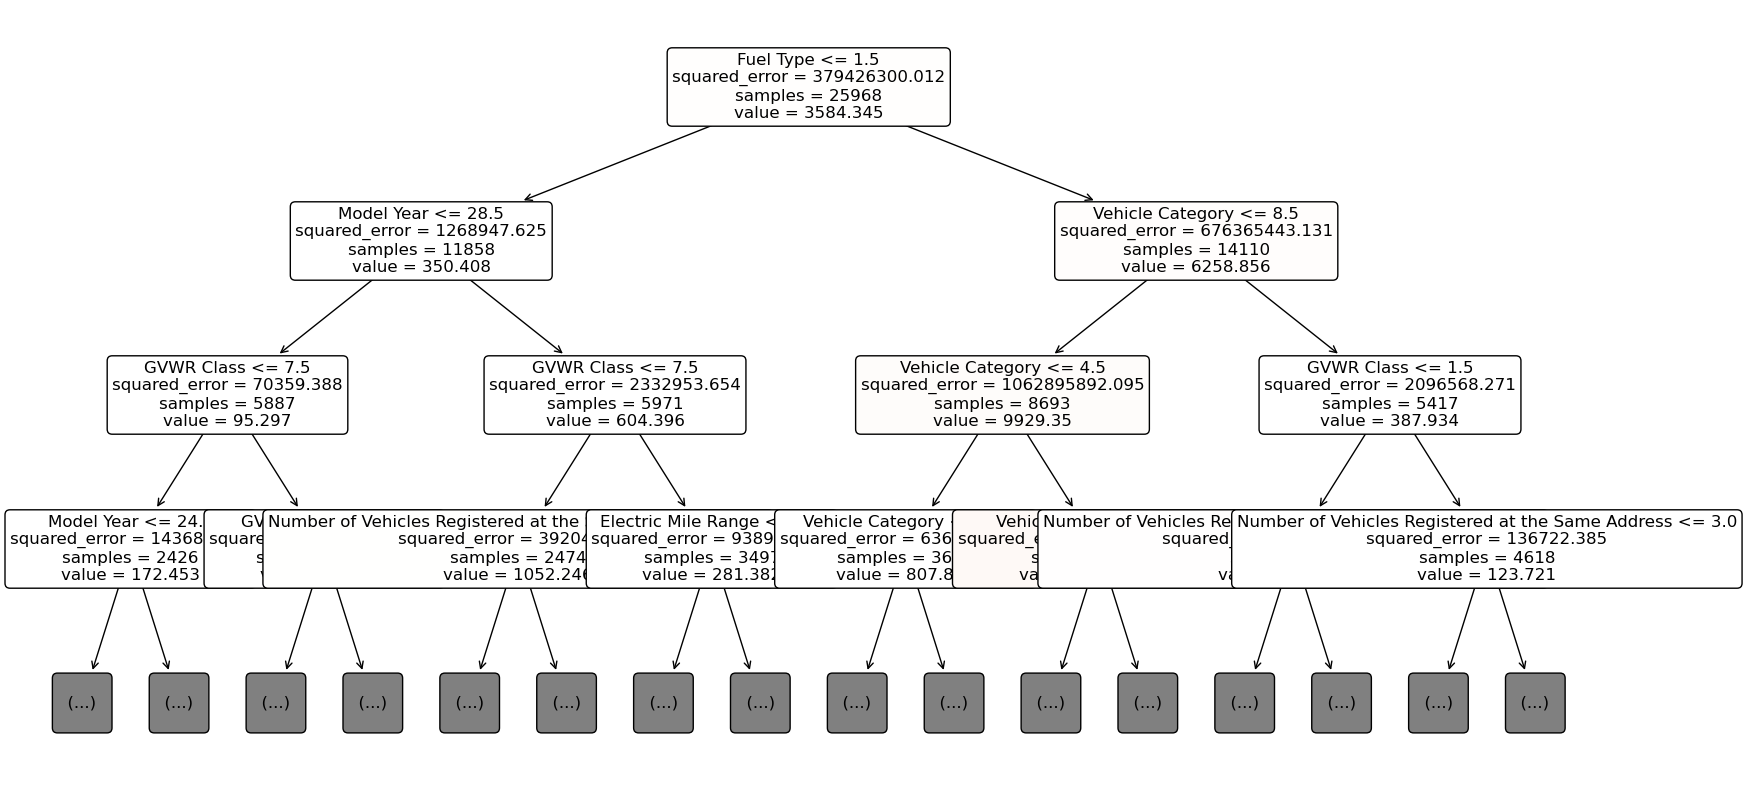

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Fit the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Extract one of the trees from the Random Forest
estimator = rf_model.estimators_[0]

# Plot the first three layers of the tree with larger font size
plt.figure(figsize=(20, 10))
plot_tree(estimator, max_depth=3, filled=True, feature_names=X_train.columns, rounded=True, fontsize=12)
plt.show()

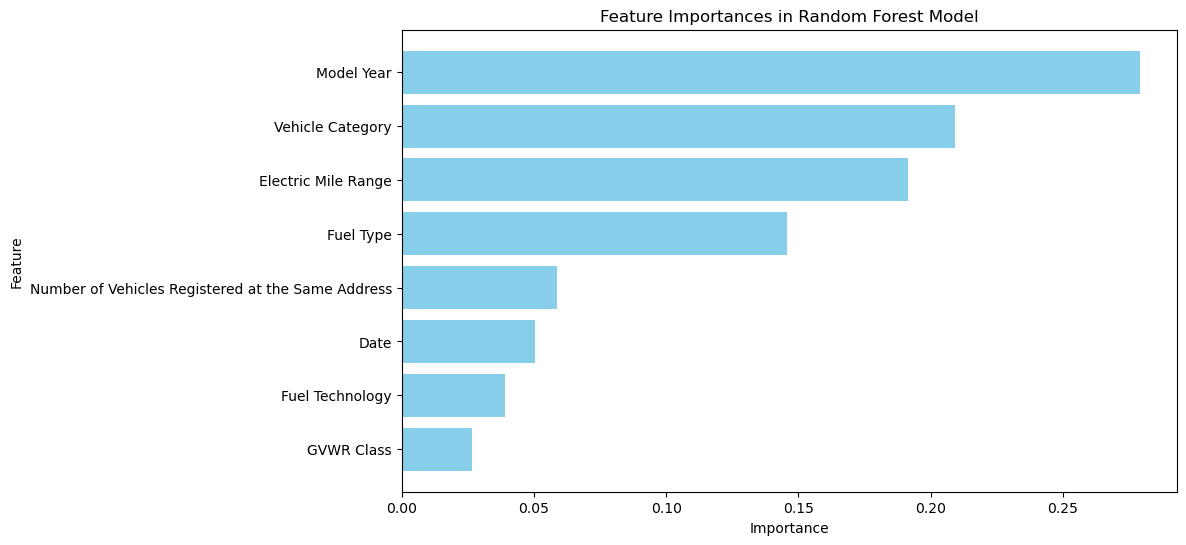

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# Fit the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame for feature importances
feature_importances_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances in Random Forest Model')
plt.gca().invert_yaxis()
plt.show()

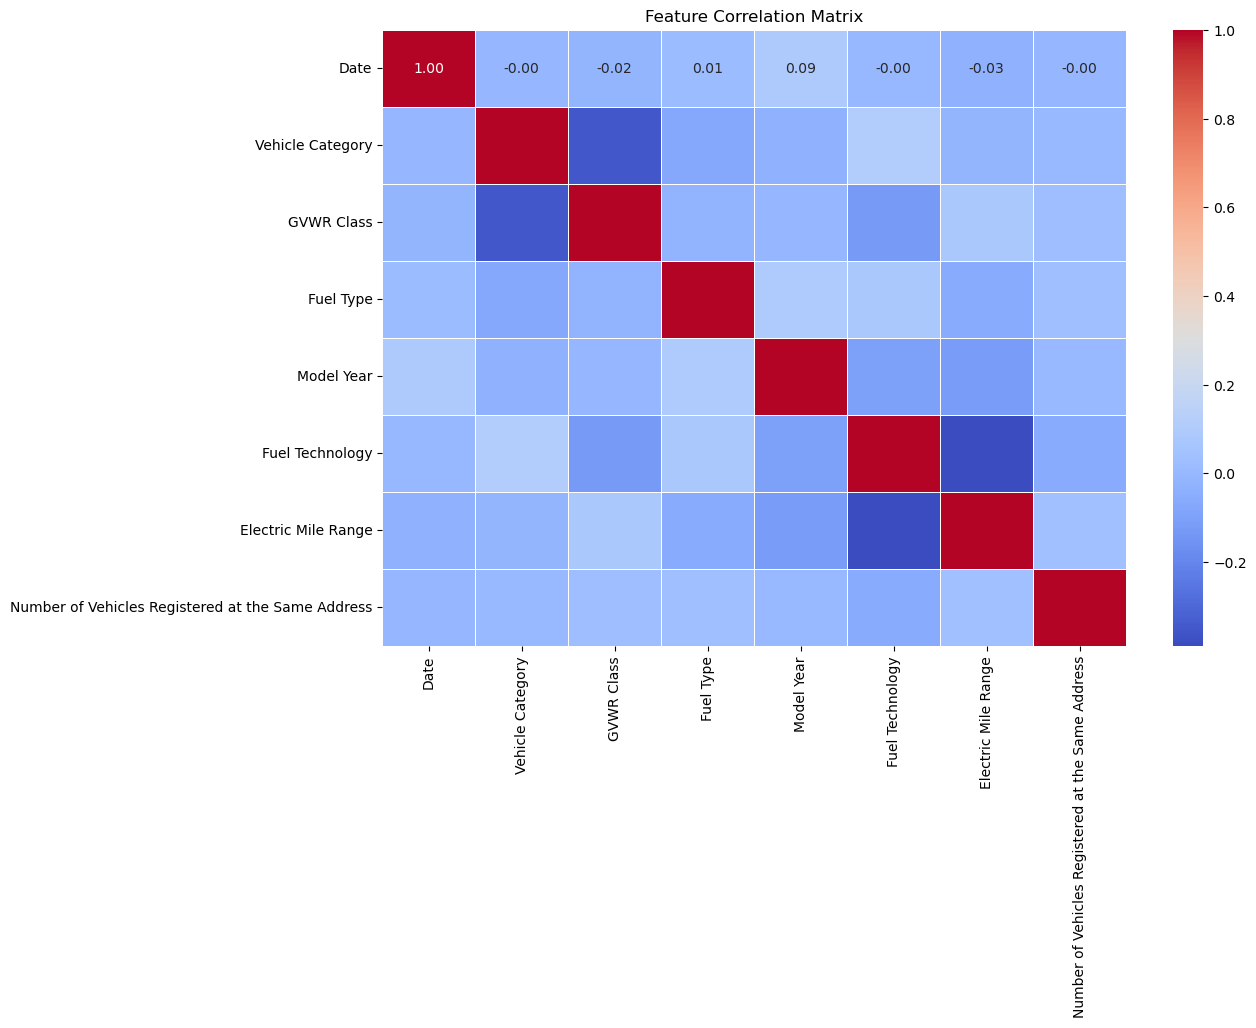

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get Feature Correlation

# Calculate the correlation matrix
correlation_matrix = X_train.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.show()

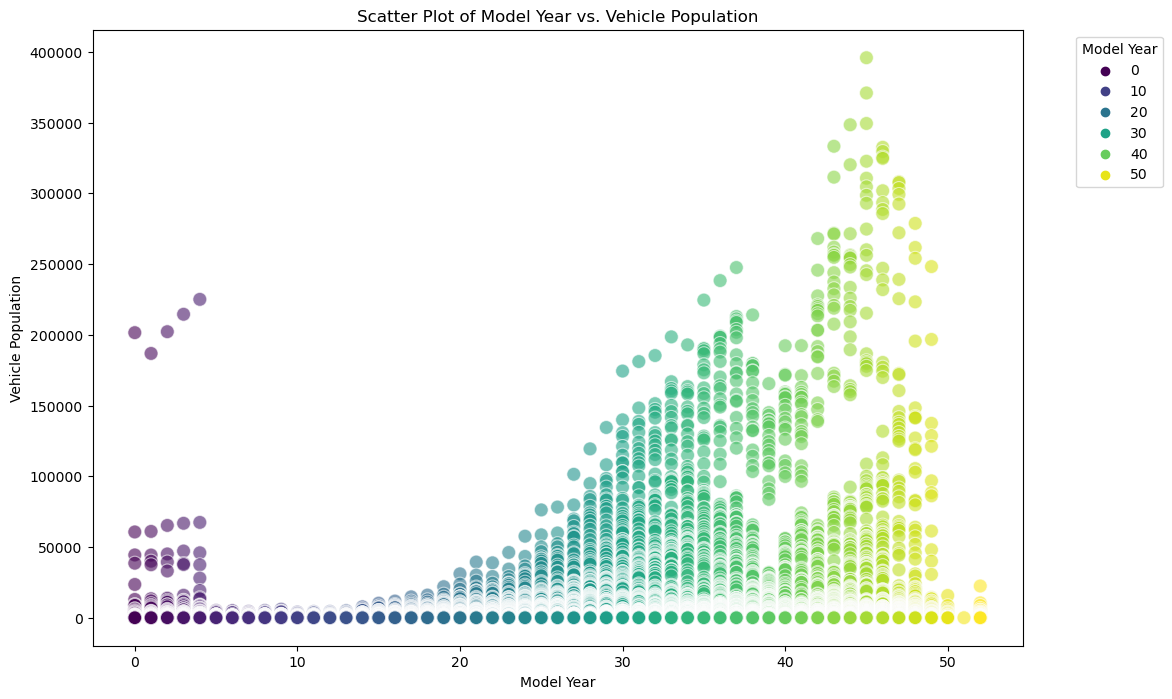

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'Vehicle Population' is the target variable and 'Categorical Feature' is the feature you want to plot
categorical_feature = 'Model Year'  # Replace with your actual categorical feature name
vehicle_population = 'Vehicle Population'  # Replace with your actual vehicle population column name

# Create a scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(data = df_train,  x = categorical_feature, y = vehicle_population, hue = categorical_feature, palette='viridis', s=100, alpha=0.6, edgecolor='w')
plt.title(f'Scatter Plot of {categorical_feature} vs. {vehicle_population}')
plt.xlabel(categorical_feature)
plt.ylabel(vehicle_population)
plt.legend(title=categorical_feature, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

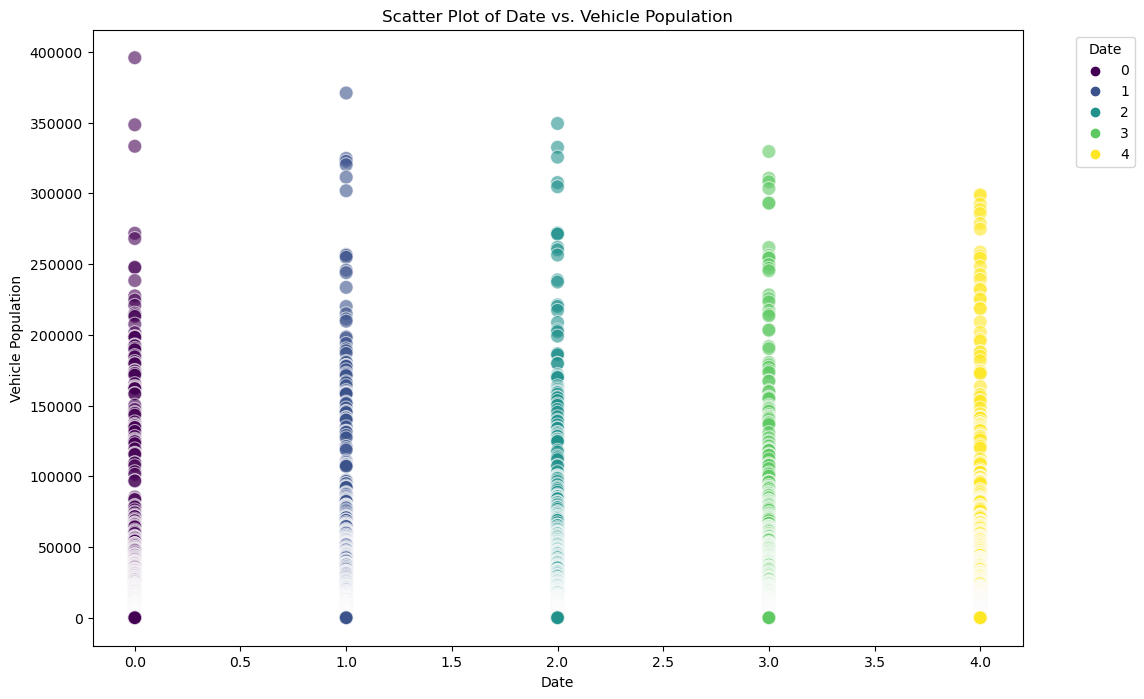

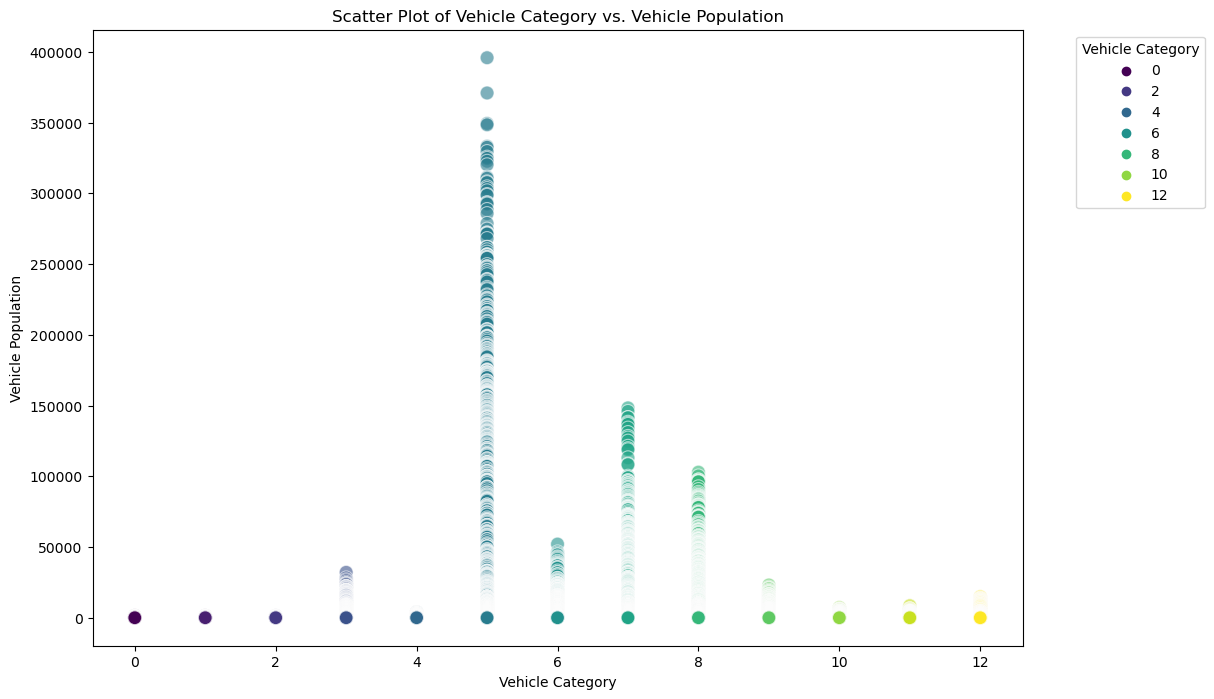

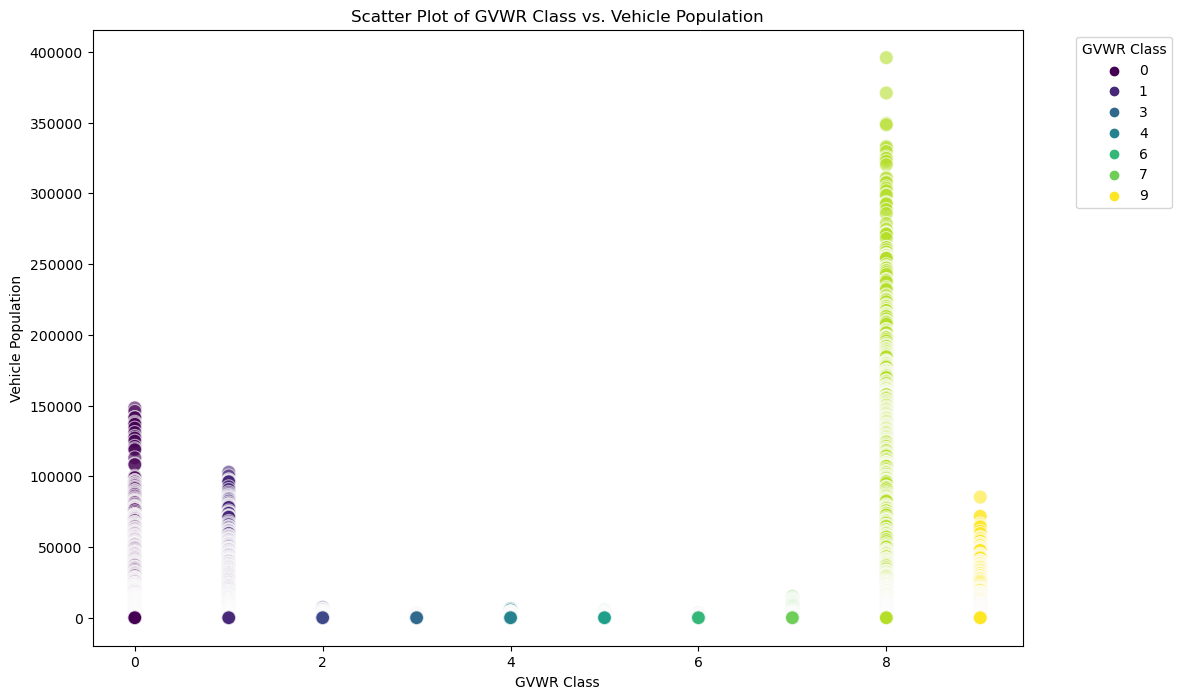

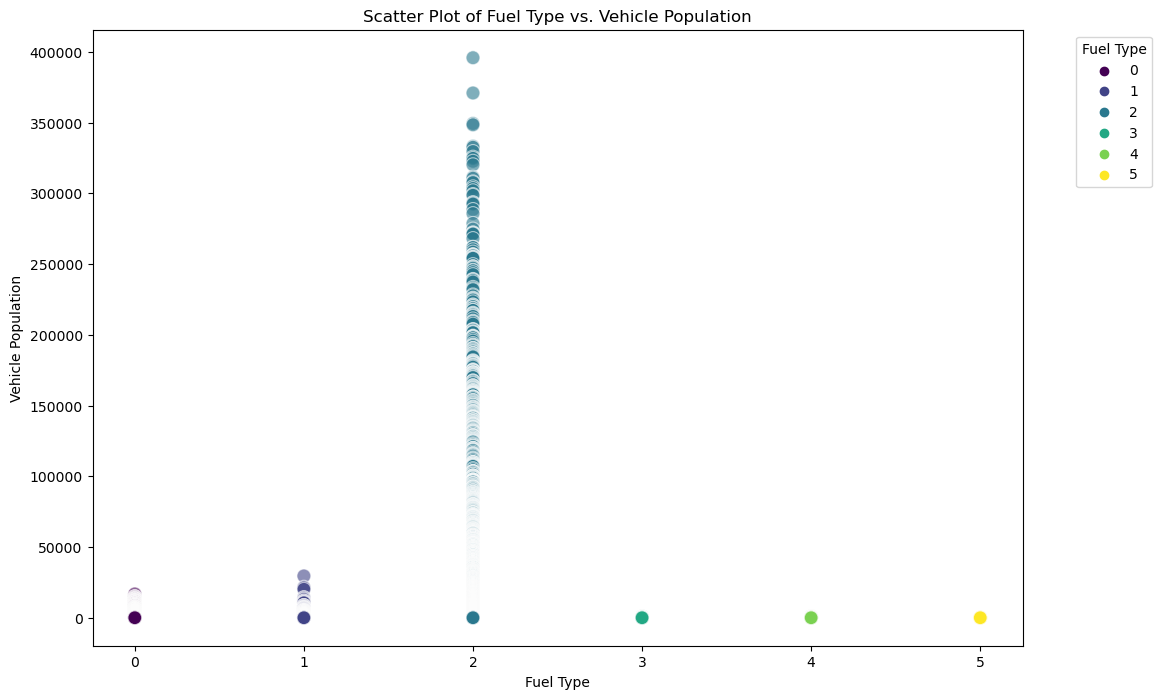

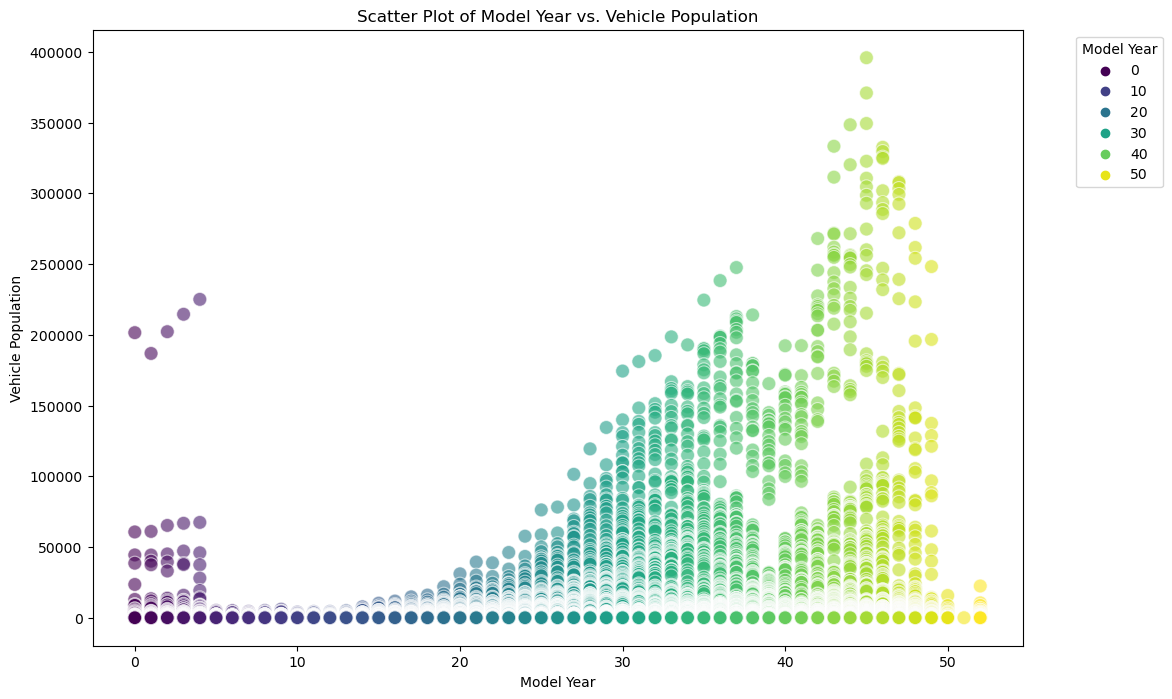

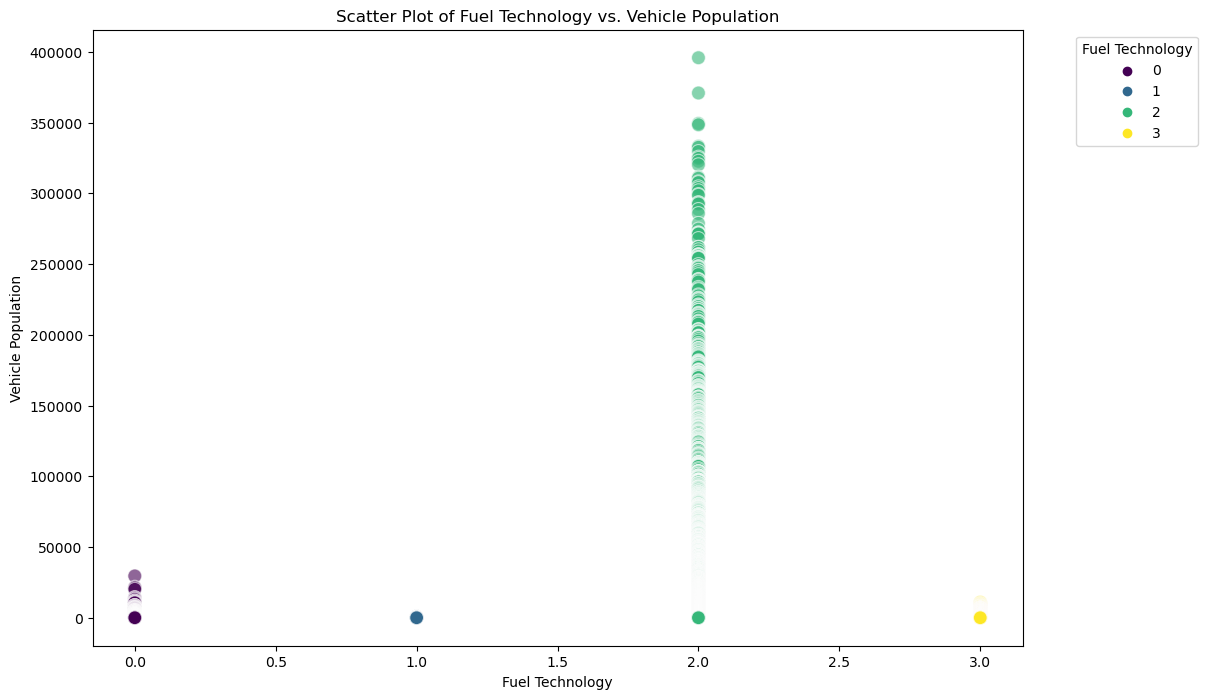

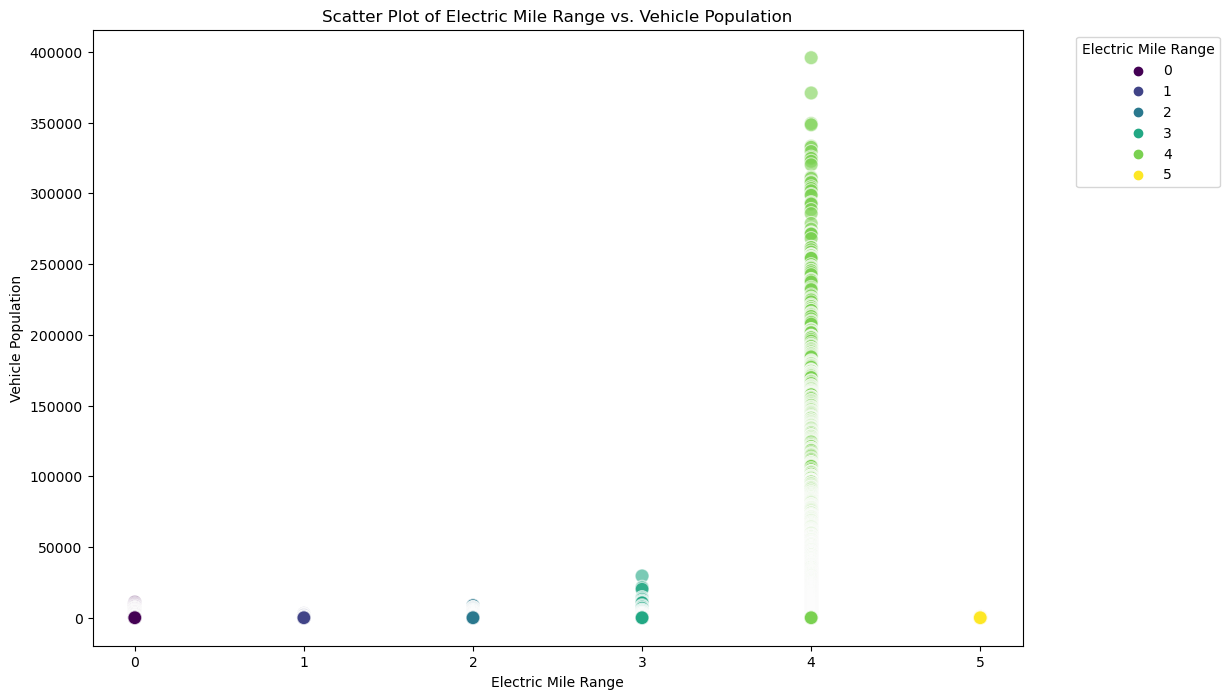

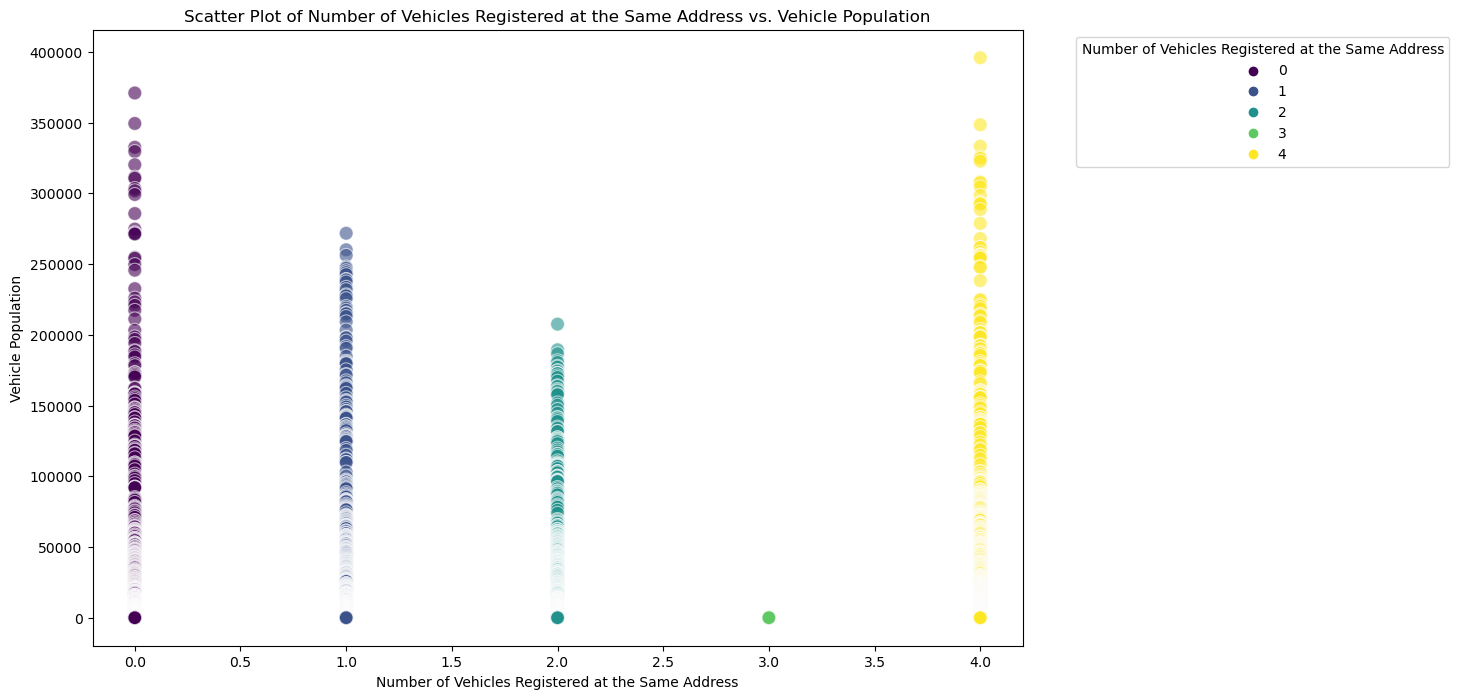

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

categorical_features = ['Date', 'Vehicle Category', 'GVWR Class', 'Fuel Type', 'Model Year', 'Fuel Technology', 'Electric Mile Range', 'Number of Vehicles Registered at the Same Address']
for categorical_feature in categorical_features:
    # Assuming 'Vehicle Population' is the target variable and 'Categorical Feature' is the feature you want to plot
    vehicle_population = 'Vehicle Population'  # Replace with your actual vehicle population column name

    # Create a scatter plot
    plt.figure(figsize=(12, 8))
    sns.scatterplot(data = df_train,  x = categorical_feature, y = vehicle_population, hue = categorical_feature, palette='viridis', s=100, alpha=0.6, edgecolor='w')
    plt.title(f'Scatter Plot of {categorical_feature} vs. {vehicle_population}')
    plt.xlabel(categorical_feature)
    plt.ylabel(vehicle_population)
    plt.legend(title=categorical_feature, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()